In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [202]:
data = pd.read_csv("./Fuel_Consumption_2000-2022.csv")
data["FUEL"].value_counts()

FUEL
X    11822
Z     9316
E     1071
D      314
N       33
Name: count, dtype: int64

In [203]:
selected_data = data[data["FUEL"] == "X"][["FUEL CONSUMPTION","EMISSIONS"]]
selected_data

,FUEL CONSUMPTION,EMISSIONS
0,9.2,186
1,8.5,175
4,10.0,198
5,9.3,189
60,11.6,223
...,...,...
22540,8.4,178
22541,9.5,200
22542,10.6,222
22543,11.0,229


In [204]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11822 entries, 0 to 22550
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FUEL CONSUMPTION  11822 non-null  float64
 1   EMISSIONS         11822 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 277.1 KB


In [205]:
array_data = selected_data.values
array_data

array([[  9.2, 186. ],
       [  8.5, 175. ],
       [ 10. , 198. ],
       ...,
       [ 10.6, 222. ],
       [ 11. , 229. ],
       [ 10.7, 217. ]])

## Vogliamo creare una regressione lineare che a partire dal valore  del consumo fornisca il valore delle emissioni

In [206]:
x = array_data[:,0]
x

array([ 9.2,  8.5, 10. , ..., 10.6, 11. , 10.7])

In [207]:
y = array_data[:,1]
y

array([186., 175., 198., ..., 222., 229., 217.])

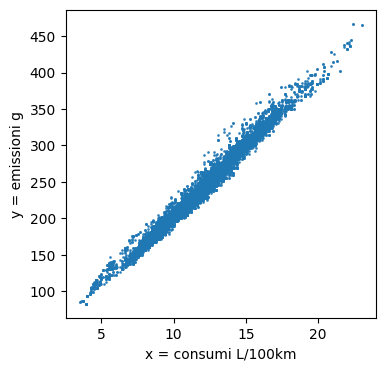

In [208]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x, y, s = 1., alpha = 0.8)
ax.set_xlabel("x = consumi L/100km")
ax.set_ylabel("y = emissioni g")
plt.show()

## Normalizzo i dati

In [209]:
x_norm = (x - np.mean(x))/ np.std(x)
x_norm

array([-0.88597673, -1.11580616, -0.62331452, ..., -0.42631786,
       -0.29498675, -0.39348508])

In [210]:
y_norm = (y - np.mean(y))/ np.std(y)
y_norm

array([-0.91497329, -1.10039273, -0.71269753, ..., -0.30814601,
       -0.19015182, -0.39242758])

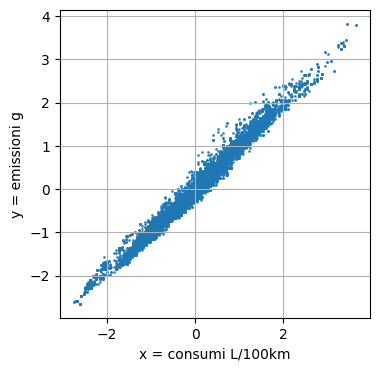

In [211]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x_norm, y_norm, s = 1., alpha = 0.8)
ax.set_xlabel("x = consumi L/100km")
ax.set_ylabel("y = emissioni g")
ax.grid()
plt.show()

In [212]:
x_norm[:,np.newaxis]

regression = LinearRegression()
regression.fit(x_norm[:,np.newaxis], y_norm)

LinearRegression()

In [213]:
regression.score(x_norm[:,np.newaxis], y_norm)

0.9799021839548075

In [214]:
print(f"il coefficiente della retta è {regression.coef_}")
print(f"il termine noto di una retta è {regression.intercept_}")

il coefficiente della retta è [0.98990009]
il termine noto di una retta è 1.9539097327006341e-16


In [215]:
array_x = np.linspace(-3,3,100)
array_y = regression.coef_[0]*array_x+ regression.intercept_

### abbiamo fatto la retta

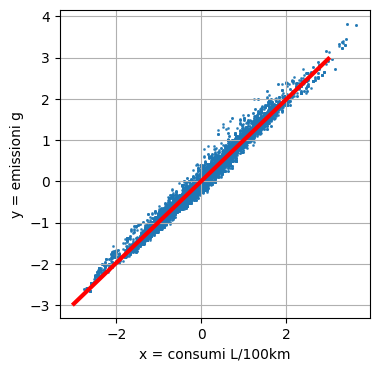

In [216]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x_norm, y_norm, s = 1., alpha = 0.8)
ax.plot(array_x, array_y, linewidth=3, color="red")
ax.set_xlabel("x = consumi L/100km")
ax.set_ylabel("y = emissioni g")
ax.grid()
plt.show()